In [875]:
import pandas as pd
import numpy as np
import missingno as msn
import math
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression 

#EDA
The first step is to make exploratory analysis to understand the data frame and if it is fit to be used in the project it is required.

##The data frame
This datafrae was provided as an excel file. First step was to convert it to CSV format. The dataframe is going to be read in order to proceed with the exploratory analysis.

In [793]:
raw_data = pd.read_csv('/content/drive/MyDrive/Enhance IT Data Science Course/Week 1/Asignment/Data/raw_house_data.csv')
raw_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318,3,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772,0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,None
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",None


## Columns
### Column quantity
The dataframe has 16 different columns.

In [794]:
len(raw_data.columns)

16

### Column names
The following are the column names in the dataframe.

In [795]:
raw_data.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

### Column Types
Each column is a diferent variable and these are their types. There are some variables who are objects. It won't be possible to handle the properly so something important to consider is to change them to its respective type.

In [796]:
raw_data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

##Missing data

###First glance
At first glance, there is missing data. The instances with the more missing are the variables with 14 missing values. Theres is a problem though. There are some columns in the dataframe with type 'object'. And in the graphic below they are considered as a not missing value. Also, in some cases, some not missing values could be managed diferently to the variable's context. Further explication will be provided later in this document.


The dataaset has missing values.

In [797]:
raw_data.isnull().values.any()

True

Missing values per column.

In [798]:
raw_data.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

Total missing values

In [799]:
raw_data.isnull().sum().sum()

35

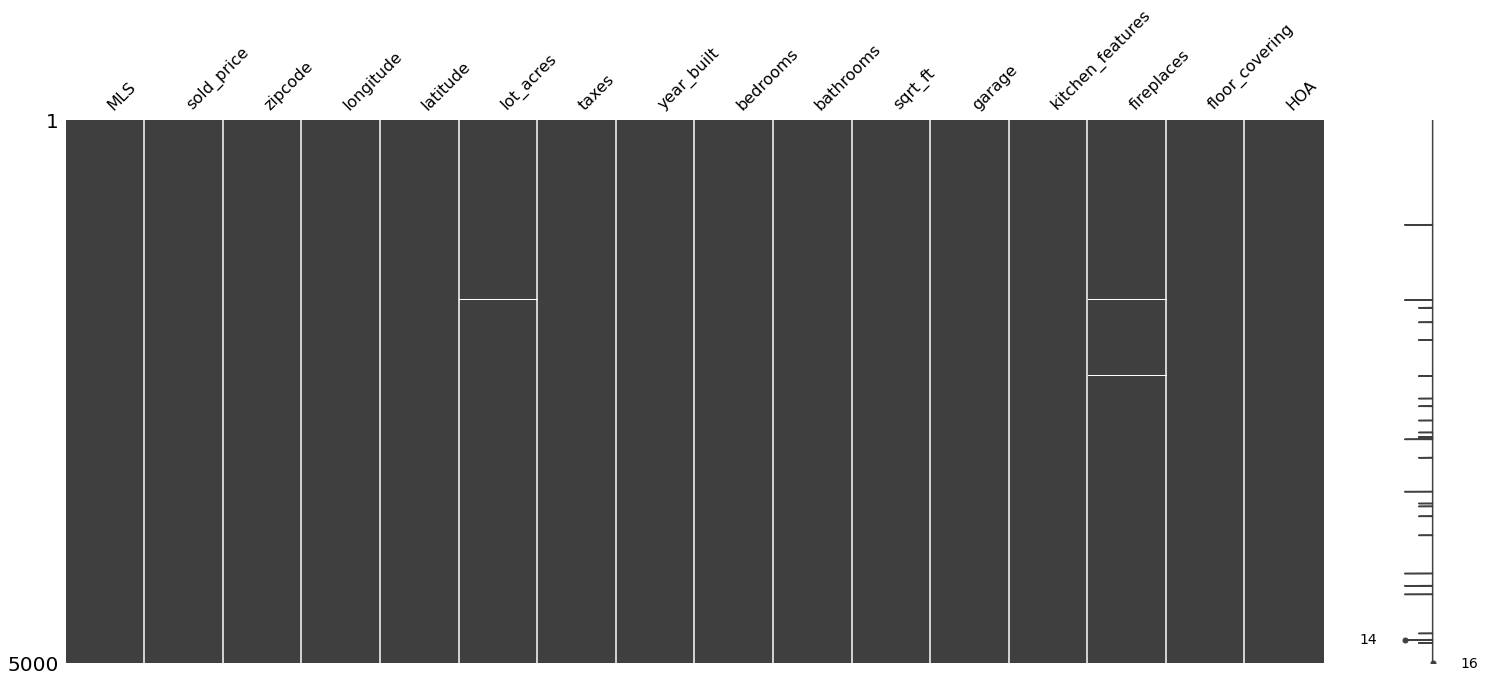

In [800]:
msn.matrix(raw_data)

##Column Values
Next step is exploring the columns one by one.

###MLS - Int

In [801]:
raw_data['MLS'].sort_values().unique()

array([ 3042851,  3044500,  3044867, ..., 21925429, 21926082, 21928565])

###sold_price - Float

In [802]:
raw_data['sold_price'].sort_values().unique()

array([ 169000.,  300000.,  375000., ..., 4200000., 4500000., 5300000.])

In [803]:
len(raw_data['sold_price'].sort_values().unique())

1092

In [804]:
min(raw_data['sold_price'])

169000.0

In [805]:
max(raw_data['sold_price'])

5300000.0

###Zipcode - Int

In [806]:
raw_data['zipcode'].sort_values().unique()

array([85118, 85192, 85541, 85601, 85602, 85603, 85605, 85609, 85610,
       85611, 85614, 85615, 85619, 85621, 85622, 85623, 85624, 85625,
       85629, 85630, 85637, 85638, 85640, 85641, 85643, 85645, 85646,
       85648, 85658, 85701, 85704, 85705, 85710, 85711, 85712, 85713,
       85715, 85716, 85718, 85719, 85730, 85737, 85739, 85742, 85743,
       85745, 85747, 85748, 85749, 85750, 85755, 85901, 85929, 85935,
       86024, 86323])

In [807]:
len(raw_data['zipcode'].sort_values().unique())

56

###Longitude - Float

In [808]:
raw_data['longitude'].sort_values().unique()

array([-112.520168, -111.430863, -111.33586 , ..., -109.826222,
       -109.685284, -109.454637])

In [809]:
len(raw_data['longitude'].sort_values().unique())

4762

###Latitude - Float

In [810]:
raw_data['latitude'].sort_values().unique()

array([31.356362, 31.361562, 31.375394, ..., 34.314889, 34.596971,
       34.927884])

In [811]:
len(raw_data['latitude'].sort_values().unique())

4821

###lot_acres

In [812]:
raw_data['lot_acres'].sort_values().unique()

array([0.00000e+00, 2.00000e-02, 3.00000e-02, 4.00000e-02, 5.00000e-02,
       6.00000e-02, 7.00000e-02, 8.00000e-02, 9.00000e-02, 1.00000e-01,
       1.10000e-01, 1.20000e-01, 1.30000e-01, 1.40000e-01, 1.50000e-01,
       1.60000e-01, 1.70000e-01, 1.80000e-01, 1.90000e-01, 2.00000e-01,
       2.10000e-01, 2.20000e-01, 2.30000e-01, 2.40000e-01, 2.50000e-01,
       2.60000e-01, 2.70000e-01, 2.80000e-01, 2.90000e-01, 3.00000e-01,
       3.10000e-01, 3.20000e-01, 3.30000e-01, 3.40000e-01, 3.50000e-01,
       3.60000e-01, 3.70000e-01, 3.80000e-01, 3.90000e-01, 4.00000e-01,
       4.10000e-01, 4.20000e-01, 4.30000e-01, 4.40000e-01, 4.50000e-01,
       4.60000e-01, 4.70000e-01, 4.80000e-01, 4.90000e-01, 5.00000e-01,
       5.10000e-01, 5.20000e-01, 5.30000e-01, 5.40000e-01, 5.50000e-01,
       5.60000e-01, 5.70000e-01, 5.80000e-01, 5.90000e-01, 6.00000e-01,
       6.10000e-01, 6.20000e-01, 6.30000e-01, 6.40000e-01, 6.50000e-01,
       6.60000e-01, 6.70000e-01, 6.80000e-01, 6.90000e-01, 7.000

In [813]:
len(raw_data['lot_acres'].sort_values().unique())

646

In [814]:
raw_data['lot_acres'].isna().sum()

10

###Taxes - Float

In [815]:
raw_data['taxes'].sort_values().unique()

array([0.0000000e+00, 1.0000000e+00, 2.0000000e+00, ..., 3.2442220e+04,
       6.6805900e+05, 1.2215075e+07])

In [816]:
len(raw_data['taxes'].sort_values().unique())

4719

###Year built - Int

In [817]:
raw_data['year_built'].sort_values().unique()

array([   0, 1893, 1900, 1901, 1902, 1905, 1907, 1910, 1911, 1913, 1914,
       1917, 1918, 1919, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [818]:
len(raw_data['year_built'].sort_values().unique())

112

###Bedrooms - Int

In [819]:
raw_data['bedrooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 18, 19, 36])

In [820]:
len(raw_data['year_built'].sort_values().unique())

112

###Bathrooms - Object

In [821]:
raw_data['bathrooms'].sort_values().unique()

array(['1', '10', '11', '14', '15', '18', '2', '2.5', '3', '3.5', '35',
       '36', '4', '4.5', '5', '6', '7', '8', '9', 'None'], dtype=object)

In [822]:
len(raw_data['bathrooms'].sort_values().unique())

20

###Squared feet - Object

In [823]:
raw_data['sqrt_ft'].sort_values().unique()

array(['10258', '10318', '10417', ..., '9630', '9858', 'None'],
      dtype=object)

In [824]:
len(raw_data['sqrt_ft'].sort_values().unique())

2362

###Garage - Object

In [825]:
raw_data['garage'].sort_values().unique()

array(['0', '1', '10', '11', '12', '13', '15', '2', '2.5', '20', '22',
       '3', '3.5', '30', '4', '4.5', '5', '6', '7', '8', '9', 'None'],
      dtype=object)

In [826]:
len(raw_data['garage'].sort_values().unique())

22

###Kitchen features - Object

In [827]:
kf = raw_data['kitchen_features'].sort_values().unique()
for i in kf:
  print(i)

# of Ovens: 1, Dishwasher, Freezer, Garbage Disposal, Gas Range, Refrigerator, Appliance Color: Stainless, Countertops: Slate
# of Ovens: 2, Dishwasher, Double Sink, Electric Oven, Garbage Disposal, Gas Cooktop, Island, Microwave, Pantry: Closet, Prep Sink, Refrigerator, Reverse Osmosis, Wine Cooler, Appliance Color: Stainless, Countertops: Granite
Compactor, Desk, Dishwasher, Double Sink, Electric Range, Freezer, Garbage Disposal, Island, Pantry: Cabinet, Refrigerator, Appliance Color: Stainless, Countertops: Granite, Microwave: Stainless, Oven: Double wall
Compactor, Desk, Dishwasher, Double Sink, Electric Range, Garbage Disposal, Gas Range, Island, Pantry: Closet, Refrigerator, Appliance Color: Black, Countertops: Marble
Compactor, Desk, Dishwasher, Double Sink, Electric Range, Garbage Disposal, Gas Range, Island, Pantry: Walk-In, Refrigerator, Appliance Color: Stainless, Countertops: marble, Microwave: built in
Compactor, Desk, Dishwasher, Double Sink, Electric Range, Garbage Dispo

In [828]:
len(raw_data['kitchen_features'].sort_values().unique())

1872

###Fireplaces - Int 

In [829]:
raw_data['fireplaces'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan])

In [830]:
len(raw_data['fireplaces'].sort_values().unique())

11

In [831]:
raw_data['fireplaces'].isna().sum()

25

###Floor covering - Object

In [832]:
raw_data['floor_covering'].sort_values().unique()

array(['Carpet', 'Carpet, Ceramic Tile', 'Carpet, Ceramic Tile, Concrete',
       'Carpet, Ceramic Tile, Concrete, Indoor/Outdoor, Natural Stone, Vinyl',
       'Carpet, Ceramic Tile, Concrete, Laminate',
       'Carpet, Ceramic Tile, Concrete, Mexican Tile',
       'Carpet, Ceramic Tile, Concrete, Mexican Tile, Natural Stone',
       'Carpet, Ceramic Tile, Concrete, Mexican Tile, Wood',
       'Carpet, Ceramic Tile, Concrete, Natural Stone',
       'Carpet, Ceramic Tile, Concrete, Natural Stone, Wood',
       'Carpet, Ceramic Tile, Concrete, Other',
       'Carpet, Ceramic Tile, Concrete, Other: Brick inlayed',
       'Carpet, Ceramic Tile, Concrete, Other: cork',
       'Carpet, Ceramic Tile, Concrete, Vinyl',
       'Carpet, Ceramic Tile, Concrete, Wood',
       'Carpet, Ceramic Tile, Concrete, Wood, Other',
       'Carpet, Ceramic Tile, Indoor/Outdoor',
       'Carpet, Ceramic Tile, Indoor/Outdoor, Natural Stone',
       'Carpet, Ceramic Tile, Indoor/Outdoor, Wood',
       'Carpet,

In [833]:
len(raw_data['floor_covering'].sort_values().unique())

311

###HOA - Object





In [834]:
raw_data['HOA'].sort_values().unique()

array(['0', '1', '1,000', '1,010', '1,100', '1,200', '1,270', '1,290',
       '1,600', '1,717', '1,769', '10', '10.83', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '11', '11.08',
       '110', '111', '112', '112.38', '113', '114', '115', '116', '117',
       '118', '119', '119.66', '12', '120', '121', '122', '123', '123.44',
       '124', '125', '126', '127', '128', '129', '13', '130', '131',
       '132', '132.66', '133', '134', '134.5', '135', '136', '137', '138',
       '139', '14', '14.58', '140', '141', '141.66', '141.67', '142',
       '143', '144', '145', '145.83', '146', '147', '148', '149',
       '149.04', '149.5', '15', '15.41', '15.45', '150', '151', '152',
       '153', '154', '155', '156', '157', '157.33', '158', '159', '16',
       '16.66', '16.67', '160', '161', '162', '164', '165', '166',
       '166.66', '167', '168', '168.92', '169', '17', '170', '171', '172',
       '173', '174', '175', '176', '177', '177.34', '178', '179', '18',
   

In [835]:
len(raw_data['HOA'].sort_values().unique())

381

#Data Cleaning

For data cleaning it is necesary to perform the following tasks:

* Changing object columns to string, int or float depending the case.
* Delete rows and/or Predict missing values

##Object type columns
The columns who has object type are the following:
* bathrooms
* sqrt_ft
* garage
* kitchen_features
* floor_covering
* HOA

##Changing object columns to int or float
First step is to change all 'None' values to nan values.

In [836]:
#Change all 'none' to nan
raw_data = raw_data.fillna(value=np.nan)

In [837]:
raw_data.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [838]:
raw_data.isnull().sum().sum()

35

No changes has been made after changing 'None' values to nan values, so the 'None' values in the object columns are a different data type. ie: string
### Some things to consider
* In the 'floor_covering' column, there are two strings to consider as nan: 'None' and 'Other: None'. In this project both will be considered as nan due to both means the same.
* In the 'kitchen_features' column there are 'None' values and actual string values who have the 'none' status in microwave, so only the first one will be consider as nan since in the second case 'none' is considered part of the kitchen information.
* Object columns who have string and int values have any extraordinary situation and will be considered as their respective values after replacing 'None' for nan.

### Replacing values column by column
#### Bathrooms

In [839]:
raw_data = raw_data.replace('None', np.nan)
raw_data['floor_covering'] = raw_data['floor_covering'].replace('Other: None', np.nan)

In [840]:
raw_data.isnull().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        2
HOA                 562
dtype: int64

In [841]:
raw_data.isnull().sum().sum()

701

Now we went from 35 nan values to 701 nan values.

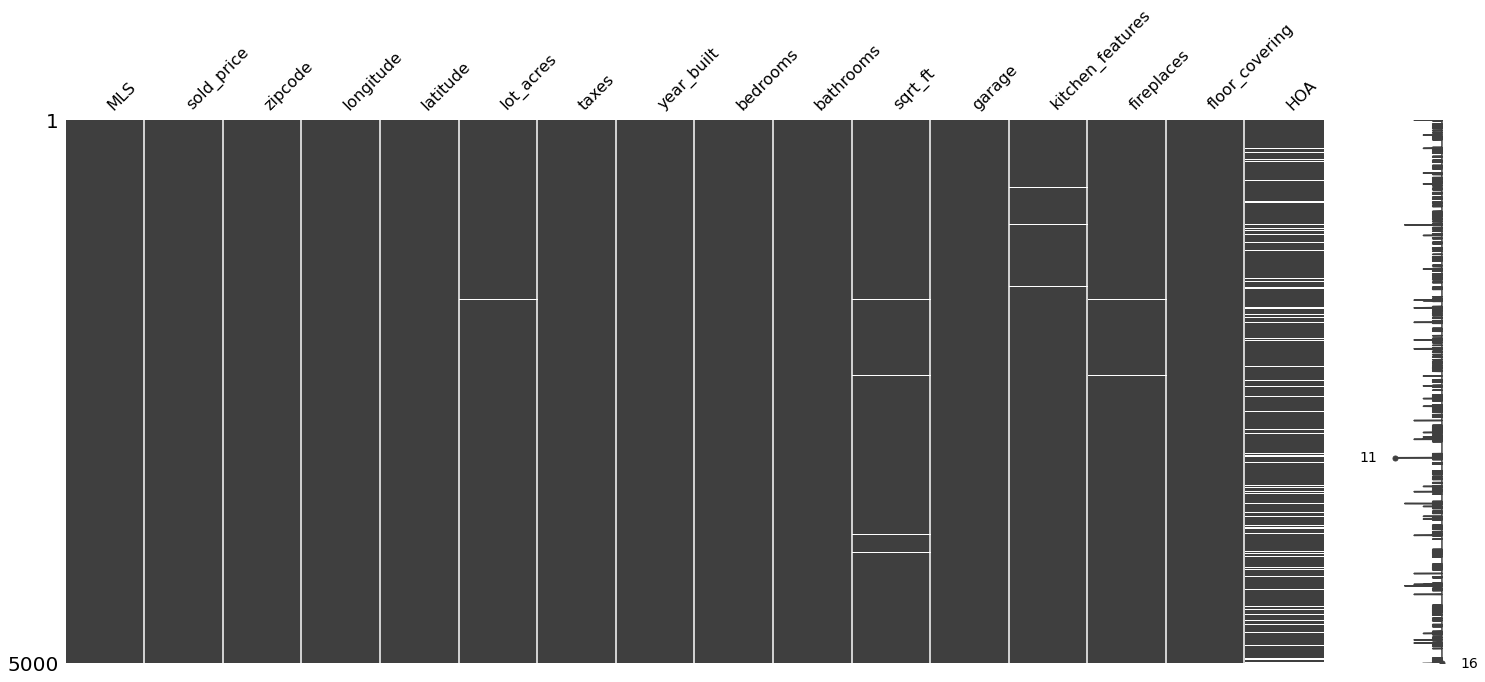

In [842]:
msn.matrix(raw_data)

###Changing object types to float or int.
For changing the object column types first it is important to understand which values are floats, so the remaining columns who are not sring type values can be converted to integer.

In [843]:
# First we change all values as numeric, then we check if any element is an instance of 
# float and the we check if there are float values in each element.
raw_data.apply(pd.to_numeric, errors="ignore").applymap(lambda x: isinstance(x, float), na_action='ignore').any()

MLS                 False
sold_price           True
zipcode             False
longitude            True
latitude             True
lot_acres            True
taxes                True
year_built          False
bedrooms            False
bathrooms            True
sqrt_ft              True
garage               True
kitchen_features    False
fireplaces           True
floor_covering      False
HOA                 False
dtype: bool

The list avobe classifies all float type columns as true and the rest as false. Now the column types can be classified as follows:

* MLS -                Int
* sold_price -         Float
* zipcode    -         Int
* longitude   -        Float
* latitude     -       Float
* lot_acres     -      Float
* taxes          -     Float
* year_built      -    Int
* bedrooms         -   Int
* bathrooms  -         Float
* sqrt_ft     -        Float
* garage       -       Float
* kitchen_features -   String
* fireplaces        -  Float
* floor_covering  -    String
* HOA            -     Int

###Things to consider
* Even though HOA column is considered not a float, some float elements and int elements with commas. Further cleanning will be needed.





In [844]:
# Change of the object columns to int or float (Excep for 'HOA' column)
raw_data['bathrooms'] = raw_data['bathrooms'].astype('float')
raw_data['sqrt_ft']  = raw_data['sqrt_ft'].astype('float')
raw_data['garage'] = raw_data['garage'].astype('float')
raw_data['kitchen_features'] = raw_data['kitchen_features'].astype('string')
raw_data['floor_covering'] = raw_data['floor_covering'].astype('string')

In [845]:
# Replaces commas in the strings with ''.
raw_data['HOA'] = raw_data['HOA'].replace(',','', regex=True)
# Converts 'HOA' column into float.
raw_data['HOA'] = raw_data['HOA'].astype('float')

In [846]:
raw_data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     string
fireplaces          float64
floor_covering       string
HOA                 float64
dtype: object

Now all columns have its respective types.

##Deletion and prediction of missing values
There are two important thing to remember. The dataset has 701 nan values. 562 of them are from 'HOA' column, making it the column with the most missing values. The other 139 are spread within 'lot_acres', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces' and 'floor_covering' columns.


In [847]:
raw_data.isnull().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        2
HOA                 562
dtype: int64

In [848]:
raw_data.isnull().sum().sum()

701

This means that besides 'HOA' column the datasest has up to 139 instances who, at least, have 1 missing value. 

In this project the rows with missing values in any column except for 'HOA' will be deleted.

Then, since the dataset has more than 10% of HOA column missing data, a prediction model will be required to complete the column's missing data.

In [850]:
len(raw_data)

5000

###HOA column missing values prediction

First it is necesary to know the correlation between the independent variable (HOA) and the dependent variables (the rest).

In [851]:
corr_matrix = raw_data.corr()
corr_matrix['HOA'].sort_values(ascending = False)

HOA           1.000000
sold_price    0.171170
latitude      0.030892
year_built    0.015036
fireplaces    0.006481
bathrooms     0.005243
taxes         0.004560
sqrt_ft       0.002485
lot_acres    -0.008533
MLS          -0.018158
longitude    -0.021703
zipcode      -0.024722
garage       -0.039678
bedrooms     -0.067988
Name: HOA, dtype: float64

Correlation is poor. The only variable who will be used in teh prediction will be 'sold_price'.

In [852]:
# Definition of x and y for the model
train_data = raw_data.drop(raw_data[raw_data.HOA.isnull()].index)
x_train = train_data['sold_price'].to_numpy()
x_train = x_train.reshape(-1, 1)
y_train = train_data['HOA']

In [853]:
np.shape(x_train)

(4438, 1)

In [854]:
# Model cration
lr = LinearRegression()
raw_data2 = raw_data.drop(raw_data[raw_data.HOA.isnull() == False].index)

In [855]:
# Model training
lr.fit(x_train, y_train)
y_pred = raw_data2['HOA'].to_numpy()
x_test = raw_data2['sold_price'].to_numpy()
y_pred = y_pred.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_pred = lr.predict(x_test)

In [883]:
# Assign predicted values to the variable new_hoa
new_hoa = pd.Series(raw_data['HOA'])
count = 0
for j, i in enumerate(new_hoa):
  if pd.isna(i):
    new_hoa[j] = y_pred[count]
    count += 1

In [859]:
# Replace the old HOA with the predicted HOA
raw_data = raw_data.drop(labels = 'HOA', axis = 1)
raw_data = raw_data.assign(HOA = new_hoa)

In [860]:
raw_data.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features    33
fireplaces          25
floor_covering       2
HOA                  0
dtype: int64

###Deletion of rows with missing values.
A deletion of the missing values for the rest of the variables will proceed.

In [862]:
# Deletion of rows with missing values
raw_data = raw_data.drop(raw_data[raw_data.lot_acres.isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data.bathrooms.isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data.sqrt_ft.isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data.garage.isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data.kitchen_features.isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data.fireplaces.isnull()].index)
raw_data = raw_data.drop(raw_data[raw_data.floor_covering.isnull()].index)

All the instances with missing values were deleted except for the missing values in the 'HOA' column. 93 instances were deleted in total.

In [863]:
raw_data.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

Our data is complete, no more missing values!

#Data Exploration Part Two
Now that the data is complete we can do some more exploration.

##Data correlation
The correlation between variables ar as follows:

In [864]:
raw_data.corr()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
MLS,1.000000,0.006897,0.165119,0.066491,0.305317,-0.037203,0.002355,0.004706,-0.045562,-0.064809,-0.090568,-0.006397,-0.062865,-0.011866
sold_price,0.006897,1.000000,-0.054891,-0.039780,0.027504,0.300523,0.023462,-0.013218,0.130678,0.354633,0.537213,0.100783,0.385343,0.181859
zipcode,0.165119,-0.054891,1.000000,0.024815,0.399569,-0.128703,-0.002074,0.041256,0.052018,-0.051133,-0.005091,0.083879,-0.010321,-0.020926
longitude,0.066491,-0.039780,0.024815,1.000000,-0.311329,0.157587,-0.001182,-0.008810,0.065387,0.020144,0.062130,-0.038961,0.049870,-0.022280
latitude,0.305317,0.027504,0.399569,-0.311329,1.000000,-0.200858,0.000037,0.087406,-0.108524,-0.075302,-0.116949,0.062169,-0.077375,0.033455
lot_acres,-0.037203,0.300523,-0.128703,0.157587,-0.200858,1.000000,-0.000726,-0.044280,0.092989,0.065832,0.120350,-0.059013,0.072893,-0.000387
taxes,0.002355,0.023462,-0.002074,-0.001182,0.000037,-0.000726,1.000000,0.000060,0.005198,0.009049,0.038007,0.005581,0.022757,0.004733
year_built,0.004706,-0.013218,0.041256,-0.008810,0.087406,-0.044280,0.000060,1.000000,-0.086732,-0.065948,-0.046857,0.105998,-0.031184,0.014170
bedrooms,-0.045562,0.130678,0.052018,0.065387,-0.108524,0.092989,0.005198,-0.086732,1.000000,0.644587,0.607460,0.060271,0.167510,-0.053494
bathrooms,-0.064809,0.354633,-0.051133,0.020144,-0.075302,0.065832,0.009049,-0.065948,0.644587,1.000000,0.710475,0.118598,0.243191,0.007561


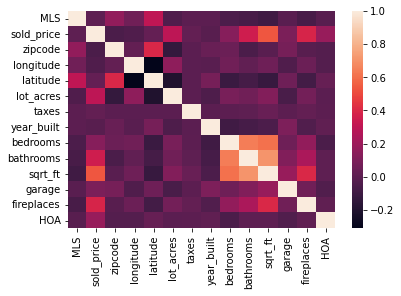

In [866]:
sns.heatmap(raw_data.corr())

##Data distribution
The following is the distribution of each numeric column. As seen, there are some outliers who are messing with the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb0a850dd0>,
      dtype=object)

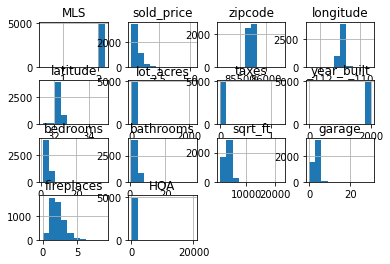

In [867]:
raw_data.hist()

It would be necesary to drop the rows with outliers.

In [881]:
clean_data = raw_data.drop(labels = ['MLS', 'zipcode', 'year_built', 'bedrooms', 'kitchen_features', 'floor_covering'], axis = 1)
z = np.abs(stats.zscore(clean_data))
raw_data = raw_data[(z<3).all(axis=1)]
raw_data.shape

(4570, 16)

As it can be seen, now the dataset has 4570 cleaned instances. As it can be seen bellow the distribution has no more outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb096a4a50>,
      dtype=object)

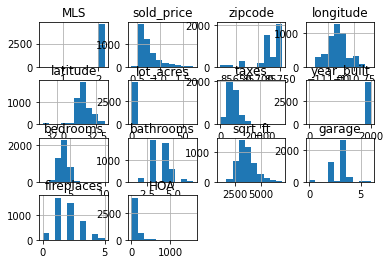

In [882]:
raw_data.hist()

Our data is ready!

#Conclussions

* The original dataset had 5000 instances.
* The data types where: 4 ints, 10 floats an 2 strings.
* In the data exploration phase, there were some challenges dealing with missing data like: Finding object type columns, dealing with strings, etc. 
* Data deletion and data prediction were needed in this project to clean the dataframe.
* Some outliers have to be deleted.
* After the cleaning process, the dataset has 4570 instances.
* 430 instances had to be deleted. 
* Correlations between variables tend to be poor.
* Columns and their type once cleaned:

* MLS - Int
* sold_price - Float
* zipcode - Int
* longitude - Float
* latitude - Float
* lot_acres - Float
* taxes - Float
* year_built - Int
* bedrooms - Int
* bathrooms - Float
* sqrt_ft - Float
*garage - Float
* kitchen_features - String
* fireplaces - Float
* floor_covering - String
* HOA - Float

